In [1]:
import matplotlib.pyplot as plt
import scipy.optimize as fit
import numpy as np

In [2]:
N = 10
m = 1.0
c = -5.0
s = 1.0

Text(0, 0.5, 'y_i')

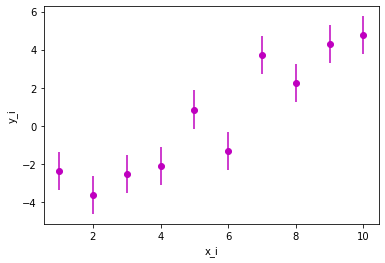

In [3]:
np.random.seed(1)
xi = np.linspace( 1, N, num=N)                    # indep. variable
yi = m*xi + c                                     #   dep. variable
yi += np.random.normal( loc=0.0, scale=s, size=N) #  variable error
si = s*np.ones( (N))
plt.errorbar(xi, yi, yerr=si,fmt='mo')
plt.xlabel("x_i")
plt.ylabel("y_i")

In [4]:
meanx = np.sum( xi)
meany = np.sum( yi)
meanx2 = np.sum( xi**2)
meany2 = np.sum( yi**2)
meanxy = np.sum( xi*yi)
meanis2 = np.sum( 1./si**2)

In [8]:
M = np.array([[meanx2,meanx],[meanx,meanis2]])
V = np.array([[meanxy],[meany]])
invM = np.linalg.inv(M)
pars = np.dot(invM,V)
mf = pars[0]
cf = pars[1]
dmf2 = N/(N*meanx2-meanx*meanx)
dcf2 = meanx2/(N*meanx2-meanx*meanx)
cov = -meanx/(N*meanx2-meanx*meanx)
print(mf,dmf2,cf,dcf2,cov)

[0.9622627] 0.012121212121212121 [-4.88958576] 0.4666666666666667 -0.06666666666666667


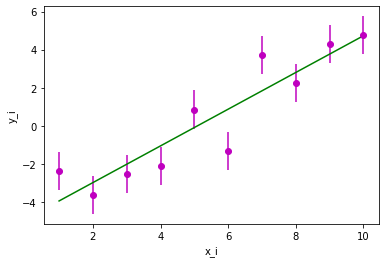

In [9]:
plt.errorbar(xi, yi, yerr=si,fmt='mo')
plt.xlabel("x_i")
plt.ylabel("y_i")
yfi = mf*xi+cf
plt.plot(xi,yfi,"g-")

In [ ]:
def func(x, a, b):
    return a*x+b
pars, covs = fit.curve_fit(func, xi, yi, sigma=si, absolute_sigma=True)
print(pars, covs)
print(mf,cf,dmf2,dcf2,cov)

In [ ]:
plt.errorbar(xi, yi, yerr=si,fmt='mo')
plt.xlabel("x_i")
plt.ylabel("y_i")
yfi = pars[0]*xi + pars[1]
plt.plot(xi,yfi,"g-")
#yfi = mf*xi + cf
#plt.plot(xi,yfi,"r--")

In [ ]:
def chisq(p0, p1, x, y, s):
    return np.sum(( (y - p0*x - p1 ) / s )**2 )
Np = 10
chi2 = np.zeros((Np, Np))
mf = np.linspace( pars[0]-3.*np.sqrt(covs[0][0]), pars[0]+3.*np.sqrt(covs[0][0]),Np)
cf = np.linspace( pars[1]-3.*np.sqrt(covs[1][1]), pars[1]+3.*np.sqrt(covs[1][1]),Np)
print(mf,cf)
im = 0
for xm in mf:
    ic = 0 
    for yc in cf:
        chi2[im][ic] = chisq(xm,yc,xi,yi,si)
        #print(xm,yc,chi2[im][ic])
        ic += 1
    im += 1 
plt.contourf(mf,cf,chi2,15)